# 项目：分析WeRateDogs的推特数据

> 通过完成本项目来提高数据整理技能。

by **Batu Mengkai**

## 目录
1. [简介](#intro)
2. [整理数据](#wrangling)
3. [探索性数据分析](#exploration)
4. [结论](#conculsion)

<a id="intro">

## 1. 简介
### 1.1 背景
WeRateDogs是一个推特主，他以诙谐幽默的方式对人们的宠物狗评分。这些评分通常以 10 作为分母。但是分子则一般大于 10：11/10、12/10、13/10 等等。WeRateDogs拥有四百多万关注者，曾受到国际媒体的报道。WeRateDogs下载了他们的推特档案，专门为本项目使用。这个档案是基本的推特数据（推特ID、时间戳、推特文本等），包含了截止到 2017 年 4 月 1 日的 5000 多条推特。

### 1.2 项目目标
清洗 WeRateDogs 推特数据，创建有趣且可靠的分析和可视化。这份推特只包含基本的推特信息。在分析和可视化前，还需要收集额外的数据、然后进行评估和清洗。

### 1.2 探索的问题
- 问题1：推特主一天当中喜欢在哪个时段发推特？一周当中喜欢在哪天发推特？
- 问题2：推特主对狗的评分高低是否与其粉丝中的大多数喜好一致？
- 问题3：哪种地位的狗狗最受人们喜欢？
- 问题4：随着时间的推移，点赞数和转发数是怎么变化的？

<a id="wrangling">

## 2. 整理数据
### 2.1 收集数据

In [1]:
#导入相关的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import json
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- **数据来源1：** 手头文件，WeRateDogs提供的推特档案文件 `twitter-archive-enhanced.csv`
- **数据来源2：**通过编程下载url如下的文件文件`image-predictions.tsv`,文件链接地址url如下

url = https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv

**作者所在新疆地区不能访问该链接，所以没有使用编程下载成功，通过其他同学分享获得该文件，但代码如下**

In [2]:
#url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
#response = requests.get(url)
#print(response) #查看是否请求成功

#if not os.path.exists('./image-predictions.tsv'):
#    with open('./image-predictions.tsv',mode = 'wb') as file:
#        file.write(response.content)

#检查文件是否下载成功
#os.listdirs(./)

- **数据来源3：**手头文件，`tweet_json.txt`

### 2.2 评估数据
#### 2.2.1 目视评估

In [3]:
#加载数据
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_image = pd.read_csv('image-predictions.tsv',sep='\t')
with open('tweet_json.txt',mode = 'r') as file:
    json_list = []
    for line in file:
        temp = json.loads(line)
        json_list.append({
                            'tweet_id': temp['id'],
                            'retweet_count': temp['retweet_count'],
                            'favorite_count': temp['favorite_count'] })

tweet_json = pd.DataFrame(json_list)

In [4]:
#随机打印数据
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1692,681302363064414209,NaN,NaN,2015-12-28 02:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuck. He's a neat dog. Very flexible....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,None,None,None,None
1651,683498322573824003,NaN,NaN,2016-01-03 04:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Griffin. He's desperate for both a phy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683498322...,11,10,Griffin,None,None,None,None
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907...,10,10,None,None,None,None,None
1788,677557565589463040,NaN,NaN,2015-12-17 18:34:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reckless pupper here. Not even looking at road...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677557565...,10,10,None,None,None,pupper,None
985,749075273010798592,NaN,NaN,2016-07-02 03:00:36 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Boomer. He's self-baptizing. Other dog...,NaN,NaN,NaN,https://vine.co/v/5ztZvHgI17r,11,10,Boomer,doggo,None,None,None


In [5]:
twitter_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,1,Tibetan_mastiff,0.915790,True,German_shepherd,0.062480,True,Leonberg,0.008297,True
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True
281,671122204919246848,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,1,goose,0.351957,False,Chihuahua,0.101228,True,hen,0.065818,False
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
366,672902681409806336,https://pbs.twimg.com/media/CVahaz9XAAA8uTy.jpg,1,ram,0.374466,False,bighorn,0.159621,False,Arabian_camel,0.111919,False


In [6]:
tweet_json.sample(5)

,favorite_count,retweet_count,tweet_id
2219,653,318,668297328638447616
633,11908,2772,793500921481273345
1705,2888,811,680609293079592961
137,27416,5351,865359393868664832
559,7919,1700,802600418706604034


**通过用excel及随机打印等方式观察数据发现以下问题：**
 
 `twitter-archive-enhanced.csv`文件中
- rating_numerator和rating_denominator列内容是数字，但是数字不准确
- 含有转发的信息内容，不需要转发的内容
- doggo，floofer,pupper,puppo这几列是属于一个变量
- 空值表示方式有NaN, None两种

#### 2.2.2 代码评估

In [7]:
#备份数据
twitter_archive_clean = twitter_archive.copy()
twitter_image_clean = twitter_image.copy()
tweet_json_clean = tweet_json.copy()

为不影响代码评估，先将NaN,None两种表示空值方式统一成NaN,代码如下：

In [8]:
twitter_archive_clean = twitter_archive_clean.replace('None',np.nan)
twitter_image_clean = twitter_image_clean.replace('None',np.nan)
tweet_json_clean = tweet_json_clean.replace('None',np.nan)

In [9]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

`twitter-archive-enhanced.csv`文件存在的问题：
- timestamp列,retweeted_status_timestamp列数据类型是object
- 含有181个retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp的数据，我们不需要转发数据
- tweet_id列数据类型是int,in_reply_to_status_id和in_reply_to_user_id列数据类型是float,应该是字符串
- in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp等列数据缺失

In [10]:
#查看是否有冗余数据
twitter_archive_clean.duplicated().sum()

0

In [11]:
#查看tweet_id是否有重复
twitter_archive_clean['tweet_id'].duplicated().sum()

0

In [12]:
#查看rating_numerator列数据情况
twitter_archive_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
pd.set_option('max_colwidth',200)

In [14]:
#查看rating_numerator大于20的列
twitter_archive_clean[twitter_archive_clean['rating_numerator']>20][['retweeted_status_id','text','rating_numerator']]

,retweeted_status_id,text,rating_numerator
188,NaN,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,NaN,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,NaN,@markhoppus 182/10,182
313,NaN,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,7.867091e+17,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,NaN,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,NaN,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,NaN,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,NaN,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,NaN,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165


In [15]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
#查看rating_denominator列数据情况
twitter_archive_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**发现问题：**
- rating_numerator有一些异常值，例如9.75/10提取了75,没有考虑小数的可能
- rating_denominator列有一些除了10以外的数据

In [17]:
#查看name列数据情况
twitter_archive_clean['name'].value_counts()

a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Buddy          7
Toby           7
Bailey         7
Daisy          7
Jack           6
Milo           6
Koda           6
Jax            6
Dave           6
Bella          6
Oscar          6
Stanley        6
Leo            6
Scout          6
Rusty          6
Finn           5
Sunny          5
              ..
Mason          1
BeBe           1
Covach         1
Holly          1
Walker         1
Harnold        1
Herb           1
Bayley         1
Murphy         1
Noosh          1
Shiloh         1
Jangle         1
Lenox          1
Sprinkles      1
Ole            1
Zuzu           1
Fido           1
Franq          1
Longfellow     1
Tripp          1
Meera          1
Napolean       1
Shawwn         1
Aiden          1
Rupert         1
Chef           1
Rose           1
Kona          

**发现问题：**
- name列含有一些诸如a,an,the的非名字的词

In [18]:
twitter_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
twitter_image_clean.tweet_id.nunique()

2075

**发现的问题：**
- tweet_id数据类型是int64,应该是str
- p1,p2,p3可以使用更描述性的词

In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
tweet_id          2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
tweet_json_clean.tweet_id.nunique()

2352

**发现的问题：**
- tweet_id数据类型是int64,应该是str

**存在的问题：**
- 三个数据表格都可以按照tweet_id进行合并。

#### 2.2.3 评估汇总
##### **质量问题：**


`twitter_archive_clean`存在的问题
1. 空值表示方式有NaN, None两种
- timestamp列,retweeted_status_timestamp列数据类型是object
- tweet_id列数据类型是int,in_reply_to_status_id和in_reply_to_user_id列数据类型是float,应该是字符串
- in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp等列数据缺失
- rating_numerator有一些异常值，
- rating_numerator有一些值提取错误，例如9.75/10提取了75,没有考虑小数的可能
- rating_denominator列有一些除了10以外的数据
- name列含有一些诸如a,an,the等小写的非名字的词
- 需要将没有图片的行删除

`twitter_image_clean`存在的问题
9. tweet_id数据类型是int64,应该是str
10. p1,p2,p3可以使用更描述性的词

`tweet_json_clean`存在的问题
11. tweet_id数据类型是int64,应该是str


##### **结构问题：**
1. doggo，floofer,pupper,puppo这几列是属于一个变量
2. 三个数据表格都可以按照tweet_id进行合并。
3. 含有181个retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp的数据，我们不需要转发数据
4. 删除不需要的列（in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列）

### 2.3 清理数据

#### 2.3.1 解决数据缺失问题

**定义**
4. in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp等列数据缺失

一些推特不存在回复及被转发，所以有些记录不存在这些数据是合理。

**定义**
1. 空值表示方式有NaN, None两种

为了更好用代码评估数据，在进行代码评估开始之前就对已经此错误进行了处理。有NaN, None两种统一为NaN

#### 2.3.2 解决数据结构问题

**定义**
3. 含有181个retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp的数据，我们不需要转发数据

方法： 筛选出这些列非空值的行，将其删除

**代码**

In [22]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

**测试**

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(3), object(10)
memo

**转发数据已经删除**

**定义**
4. 删除不需要的列（in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列）

使用drop函数删除这些列

**代码**

In [24]:
twitter_archive_clean = twitter_archive_clean.drop(labels = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis =1)

**测试**

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列已经删除

**定义**

1. doggo，floofer,pupper,puppo这几列是属于一个变量

使用melt函数将这四列合为一列，将dog_stage空值也tweet_id的值删除，将多个dog_stage的值，合并成一个值，

**代码**

In [26]:
twitter_archive_clean = twitter_archive_clean.melt(id_vars=['tweet_id','timestamp','source','text','expanded_urls','rating_numerator',
                                                           'rating_denominator','name'],var_name ='columns', value_name='dog_stage')

twitter_archive_clean = twitter_archive_clean.drop(labels = 'columns',axis =1)

In [27]:
#删除冗余的数据
twitter_archive_clean.drop_duplicates(inplace = True)

In [28]:
#查看tweet_id数据是否有重复，并显示
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated(keep=False)][['tweet_id','dog_stage']].sort_values(by='tweet_id')

,tweet_id,dog_stage
1838,672160042234327040,NaN
6188,672160042234327040,pupper
1836,672205392827572224,NaN
6186,672205392827572224,pupper
6180,672254177670729728,pupper
1830,672254177670729728,NaN
6173,672481316919734272,pupper
1823,672481316919734272,NaN
6166,672594978741354496,pupper
1816,672594978741354496,NaN


In [29]:
#删除dog_stage空值，且tweet_id是重复的行
twitter_archive_clean = twitter_archive_clean[-((twitter_archive_clean.tweet_id.duplicated(keep = False))&(twitter_archive_clean.dog_stage.isnull()))]

In [30]:
#将重复的tweet_id列的dog_stage合并
multi_dog_stage = twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated(keep=False)][['tweet_id','dog_stage']].sort_values(by='tweet_id')
multi_dog_stage = multi_dog_stage['dog_stage'].groupby(multi_dog_stage['tweet_id']).aggregate(lambda x:','.join(x)).reset_index()

In [31]:
#将不重复的dog_stage筛选出来
single_dog_stage = twitter_archive_clean[- twitter_archive_clean.tweet_id.duplicated(keep = False )][['tweet_id','dog_stage']]

In [32]:
#将single_dog_stage和multi_dog_stage合并为dog_stage
dog_stage = pd.concat([single_dog_stage,multi_dog_stage])
#将原有的dog_stage删除
twitter_archive_clean.drop(labels='dog_stage',axis = 1, inplace = True )
#将新生成的dog_stage按tweet_id合并到twitter_archive_clean
twitter_archive_clean = twitter_archive_clean.merge(dog_stage,how = 'inner',on='tweet_id')
#将重复的tweet_id行删除
twitter_archive_clean = twitter_archive_clean[-twitter_archive_clean.tweet_id.duplicated(keep='first')]

**测试**

In [33]:
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated(keep = False )][['tweet_id','dog_stage']]

,tweet_id,dog_stage


In [34]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
832,738156290900254721,2016-06-01 23:52:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Storkson. He's wet and sad. 10/10 cheer up pup https://t.co/nrzvzPuTvC,https://twitter.com/dog_rates/status/738156290900254721/photo/1,10,10,Storkson,NaN
255,833863086058651648,2017-02-21 02:17:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bentley. Hairbrushes are his favorite thing in the h*ckin world. 12/10 impawsible to say no to https://t.co/HDloTYilWZ,"https://twitter.com/dog_rates/status/833863086058651648/photo/1,https://twitter.com/dog_rates/status/833863086058651648/photo/1",12,10,Bentley,NaN
296,828046555563323392,2017-02-05 01:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sailer. He waits on the roof for his owners to come home. Nobody knows how he gets up there. H*ckin loyal af. 13/10 https://t.co/O37z4jaMG9,"https://twitter.com/dog_rates/status/828046555563323392/photo/1,https://twitter.com/dog_rates/status/828046555563323392/photo/1,https://twitter.com/dog_rates/status/828046555563323392/photo/1",13,10,Sailer,NaN


doggo，floofer,pupper,puppo列是合并成了一列

**定义**
2. 三个数据表格都可以按照tweet_id进行合并。

使用merge函数，分两次进行按tweet_id合并这三个数据，因为采用inner的方式合并，这会使没有图片的信息删除

**代码**

In [35]:
twitter_master = twitter_archive_clean.merge(tweet_json_clean,how = 'inner', on = 'tweet_id')
twitter_master = twitter_master.merge(twitter_image_clean,how = 'inner', on = 'tweet_id')

In [36]:
twitter_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,39492,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,33786,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,25445,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [37]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float6

#### 2.3.3 解决数据质量问题

**定义**

更改数据类型问题：
- timestamp列数据类型是object，
- tweet_id列数据类型是应该是字符串
- 使用方法：pd.to_datetime和astype函数更改

**代码**

In [38]:
#使用strptime函数更改timestamp的数据类型
twitter_master['timestamp'] = twitter_master['timestamp'].str[:-6]
#type(twitter_master['timestamp'][0])
twitter_master['timestamp'] = pd.to_datetime(twitter_master['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [39]:
#更改tweet_id数据类型为str
twitter_master['tweet_id'] = twitter_master['tweet_id'].astype(str)

**测试**

In [40]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-nu

In [41]:
twitter_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,39492,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


**定义** 

rating_numerator有一些值提取错误，例如9.75/10提取了75,没有考虑小数的可能
        - 重新从text提取，考虑小数点的可能性
**代码**

In [42]:
#提取包括有小数的rating_numerator
twitter_master['rating_numerator']= twitter_master.text.str.extract('(\d+\.?\d*)\/\d+',expand=False)
#这里的expand=True是返回dataframe, 如果是False返回series,新版本种的expand = None就是等于True

In [43]:
#转换数据类型为float
twitter_master['rating_numerator'] = twitter_master['rating_numerator'].astype(float)

**测试**

In [44]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1448 non-null object
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-

In [45]:
(twitter_master['rating_numerator']==9.75).sum()

1

**定义**

rating_denominator列有一些除了10以外的数据，将小于10的删除，将大于10的转换为10
    - rating_numerator = rating_numerator*10/rating_denominator 
    - rating_denominator

**代码**

In [46]:
#将小于10rating_denominator的数据删除
twitter_master = twitter_master[twitter_master.rating_denominator >=10]

In [47]:
#大于10rating_denominator的数据缩小到10
twitter_master['rating_numerator'] = 10*(twitter_master.rating_numerator.div(twitter_master.rating_denominator,axis = 'index'))
#twitter_master.rating_denominator[-(twitter_master.rating_denominator.isnull())] = 10
twitter_master.loc[twitter_master.rating_denominator.notnull(),'rating_denominator'] = 10

**测试**

In [48]:
twitter_master.rating_denominator.value_counts()

10    1992
Name: rating_denominator, dtype: int64

In [49]:
twitter_master.rating_numerator.value_counts()

12.000000      454
10.000000      421
11.000000      402
13.000000      261
9.000000       151
8.000000        95
7.000000        51
14.000000       35
5.000000        32
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
0.000000         2
11.260000        1
1776.000000      1
9.750000         1
11.270000        1
8.181818         1
13.500000        1
6.363636         1
420.000000       1
Name: rating_numerator, dtype: int64

**定义**

rating_numerator有一些异常值,将异常值删除

**代码**

In [50]:
#删除大于20的值
twitter_master = twitter_master[-(twitter_master.rating_numerator > 20)]

**测试**

In [51]:
twitter_master.rating_numerator.value_counts()

12.000000    454
10.000000    421
11.000000    402
13.000000    261
9.000000     151
8.000000      95
7.000000      51
14.000000     35
5.000000      32
6.000000      32
3.000000      19
4.000000      15
2.000000      10
1.000000       4
0.000000       2
8.181818       1
9.750000       1
13.500000      1
11.260000      1
11.270000      1
6.363636       1
Name: rating_numerator, dtype: int64

In [52]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1990 non-null object
timestamp             1990 non-null datetime64[ns]
source                1990 non-null object
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null int64
name                  1445 non-null object
dog_stage             306 non-null object
favorite_count        1990 non-null int64
retweet_count         1990 non-null int64
jpg_url               1990 non-null object
img_num               1990 non-null int64
p1                    1990 non-null object
p1_conf               1990 non-null float64
p1_dog                1990 non-null bool
p2                    1990 non-null object
p2_conf               1990 non-null float64
p2_dog                1990 non-null bool
p3                    1990 non-null object
p3_conf               1990 non-

**定义**

name列含有一些诸如a,an,the等的非名字的词，此类信息里面也没有提供名字，所以删除，具有的特点是都是小写，将小写词筛选出来删除。

**代码**

In [53]:
#测试正则表达式能否筛选出name列中小写的词
twitter_master.name[-twitter_master.name.str.extract('(^[a-z][a-z]*)',expand = False).isnull()]

19              such
120            quite
134            quite
252              one
369       incredibly
429                a
528                a
541             very
567               my
622              one
666              not
670              his
671              one
677                a
679                a
688                a
693               an
699             very
720             just
727          getting
746             very
765             this
766     unacceptable
824                a
833                a
875      infuriating
945                a
952                a
953               an
957                a
            ...     
1658               a
1664               a
1671               a
1680               a
1694               a
1710               a
1717               a
1720               a
1732           quite
1733               a
1739              an
1740               a
1751             the
1752             the
1753               a
1754               a
1755         

In [54]:
#name列是小写的替换为np.nan
twitter_master.name[-twitter_master.name.str.extract('(^[a-z][a-z]*)',expand= False).isnull()]=np.nan

**测试**

In [55]:
twitter_master.name[-twitter_master.name.str.extract('(^[a-z][a-z]*)',expand=False).isnull()]

Series([], Name: name, dtype: object)

In [56]:
twitter_master.name.value_counts()

Charlie       11
Lucy          10
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Lola           7
Toby           7
Daisy          7
Bella          6
Bo             6
Jax            6
Koda           6
Stanley        6
Bailey         5
Leo            5
Milo           5
Oscar          5
Dave           5
Rusty          5
Chester        5
Scout          5
Buddy          5
Louis          5
Finn           4
Duke           4
Gary           4
Bear           4
              ..
Horace         1
Duddles        1
Saydee         1
Iroh           1
Brandonald     1
Chompsky       1
Meera          1
Longfellow     1
Ozzy           1
Livvie         1
JD             1
Carly          1
Antony         1
Canela         1
Hall           1
Todo           1
Noosh          1
Shaggy         1
Shiloh         1
Murphy         1
Jangle         1
Amy            1
Lenox          1
Ole            1
Rizzy          1
Pepper         1
Zuzu           1
Fido          

**定义**

p1,p2,p3可以使用更描述性的词，p1,p2,p3更改为prediction1,prediction2,prediction3

**代码**

In [57]:
twitter_master= twitter_master.rename(columns = {'p1':'prediction1',
                                                 'p2':'prediction2',
                                                 'p3':'prediction3',
                                                 'p1_dog':'pred1_dog',
                                                 'p2_dog':'pred2_dog',
                                                 'p3_dog':'pred3_dog',
                                                 'p1_conf':'pred1_conf',
                                                 'p2_conf':'pred2_conf',
                                                 'p3_conf':'pred3_conf'})

**测试**

In [58]:
twitter_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'prediction1',
       'pred1_conf', 'pred1_dog', 'prediction2', 'pred2_conf', 'pred2_dog',
       'prediction3', 'pred3_conf', 'pred3_dog'],
      dtype='object')

#### 2.3.4 保存清理后的数据

In [59]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1990 non-null object
timestamp             1990 non-null datetime64[ns]
source                1990 non-null object
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null int64
name                  1348 non-null object
dog_stage             306 non-null object
favorite_count        1990 non-null int64
retweet_count         1990 non-null int64
jpg_url               1990 non-null object
img_num               1990 non-null int64
prediction1           1990 non-null object
pred1_conf            1990 non-null float64
pred1_dog             1990 non-null bool
prediction2           1990 non-null object
pred2_conf            1990 non-null float64
pred2_dog             1990 non-null bool
prediction3           1990 non-null object
pred3_conf            1990 non-

In [60]:
twitter_master.to_csv('./twitter_archive_master.csv',index=False)

<a id="exploration">

## 3.探索性数据分析

### 3.1 探索的问题1:

**推特主一天当中喜欢在哪个时段发推特？一周当中喜欢在哪天发推特？**

In [61]:
#将hour提取形成单独一列，对其分析，将周日提取形成单独一列，对其分析
twitter_master['hour'] = twitter_master.timestamp.dt.hour
twitter_master['weekday'] = twitter_master.timestamp.dt.weekday

In [62]:
twitter_master.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,pred1_conf,pred1_dog,prediction2,pred2_conf,pred2_dog,prediction3,pred3_conf,pred3_dog,hour,weekday
1600,668960084974809088,2015-11-24 01:11:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jaycob. He got scared of the vacuum. Hide &amp; seek champ. Almost better than Kony. Solid shampoo selection. 10/10 https://t.co/952hUV6RiK,https://twitter.com/dog_rates/status/668960084974809088/photo/1,10.0,10,Jaycob,NaN,753,...,0.226309,False,Chesapeake_Bay_retriever,0.165878,True,bathtub,0.056726,False,1,1


In [63]:
hour_counts = twitter_master.hour.value_counts().sort_index()
weekday_counts = twitter_master.weekday.value_counts().sort_index()

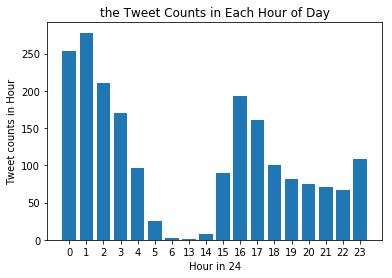

In [64]:
hour_loc = list(range(len(hour_counts)))
hour_label = list(hour_counts.index);
plt.bar(hour_loc,hour_counts.values);
plt.xticks(hour_loc,hour_label);
plt.xlabel('Hour in 24');
plt.ylabel('Tweet counts in Hour');
plt.title('the Tweet Counts in Each Hour of Day');

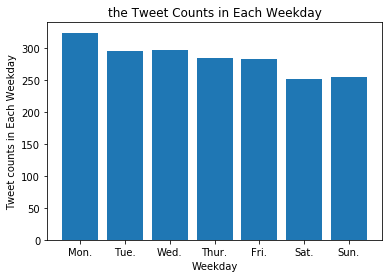

In [65]:
weekday_loc = list(range(len(weekday_counts)))
weekday_label = ['Mon.','Tue.','Wed.','Thur.','Fri.','Sat.','Sun.']
plt.bar(weekday_loc,weekday_counts.values);
plt.xticks(weekday_loc,weekday_label);
plt.xlabel('Weekday');
plt.ylabel('Tweet counts in Each Weekday');
plt.title('the Tweet Counts in Each Weekday');

**分析与结论：**
- 从第一张图可以看出，推特主明显喜欢在凌晨0点1点2点3点，及下午16点17点发推特，并且从上午6点到下午14点发推特比较少。
- 从第二张图片可以看出，一周当中，在周一到周日发推特喜好差不多，没有明显变化，周一最多，周末相对少。

### 3.2 探索的问题2:

**推特主对狗的评分高低(rating_numerator)是否与其粉丝中的大多数喜好(retweet_count&favorite_count)一致？**

    `主要看rating_numerator与retweet_count及favorite_count的线性关系`

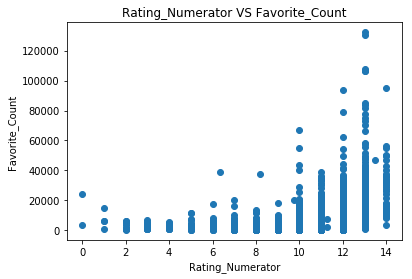

In [66]:
x = twitter_master.rating_numerator.values
y1 = twitter_master.favorite_count.values
plt.scatter(x,y1);
plt.xlabel('Rating_Numerator');
plt.ylabel('Favorite_Count');
plt.title('Rating_Numerator VS Favorite_Count');

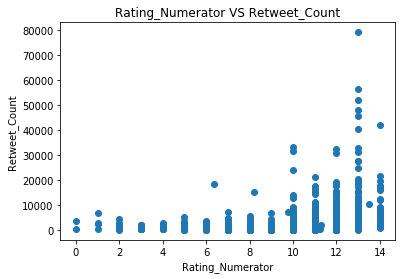

In [67]:
x = twitter_master.rating_numerator.values
y2 = twitter_master.retweet_count.values
plt.scatter(x,y2);
plt.xlabel('Rating_Numerator');
plt.ylabel('Retweet_Count');
plt.title('Rating_Numerator VS Retweet_Count');

In [68]:
#计算Rating_Numerator与Favorite_Count相关系数
np.corrcoef(x,y1)

array([[1.        , 0.40210626],
       [0.40210626, 1.        ]])

In [69]:
#计算Rating_Numerator与Retweet_Count相关系数
np.corrcoef(x,y2)

array([[1.        , 0.29929837],
       [0.29929837, 1.        ]])

In [70]:
#计算Favorite_Count与Retweet_Count相关系数
np.corrcoef(y1,y2)

array([[1.        , 0.91494203],
       [0.91494203, 1.        ]])

**分析与结论：**
- 转发数和点赞数有高度相关，相关系数是0.91，这个也是符合常理，点赞和转发都是对其喜欢的表现。
- 推特主对狗的评分与转发数和点赞数有低度相关，相关系数分别是0.30和0.40。说明每个人对狗都有自己的偏好，推特主的评分不能完全代表粉丝群体对狗的评分。

### 3.3 探索的问题3:

**哪种地位的狗狗最受人们喜欢？**

In [71]:
dog_stage_favor_count = twitter_master.groupby(['dog_stage'])['favorite_count'].sum().sort_values()
dog_stage_retweet_count = twitter_master.groupby(['dog_stage'])['retweet_count'].sum().sort_values()

Text(0.5,1,'Favorite(yellowgreen)  Retweet(skyblue)')

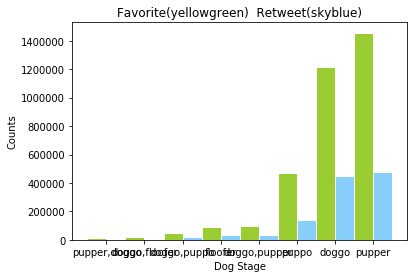

In [72]:
x = np.arange(len(dog_stage_favor_count))
y1 = dog_stage_favor_count.values
y2 = dog_stage_retweet_count.values
plt.bar(x,y1,width = 0.5, facecolor = 'yellowgreen',edgecolor = 'white');
plt.bar(x+0.5,y2,width = 0.5, facecolor = 'lightskyblue',edgecolor = 'white');
plt.xlabel('Dog Stage')
plt.ylabel('Counts');
plt.xticks(x+0.25, dog_stage_favor_count.index);
plt.title('Favorite(yellowgreen)  Retweet(skyblue)')

**分析与结论**
- 从上图可以看出，pupper地位的狗最受粉丝喜欢，这类狗的转发和点赞数最高，其次是doggo地位的狗，而floofer和puppo地位的狗相对没有那么受粉丝喜欢。

### 3.4 探索的问题4:

**随着时间的推移，点赞数和转发数是怎么变化的？**

In [73]:
time_favor_retwe = twitter_master[['timestamp','favorite_count','retweet_count']].sort_values(by = 'timestamp')

In [74]:
#计算移动平均数
x = time_favor_retwe['timestamp']
y1 = pd.rolling_mean(time_favor_retwe['favorite_count'],20).values
y2 = pd.rolling_mean(time_favor_retwe['retweet_count'],20).values

C:\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  app.launch_new_instance()
C:\Anaconda\envs\py3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


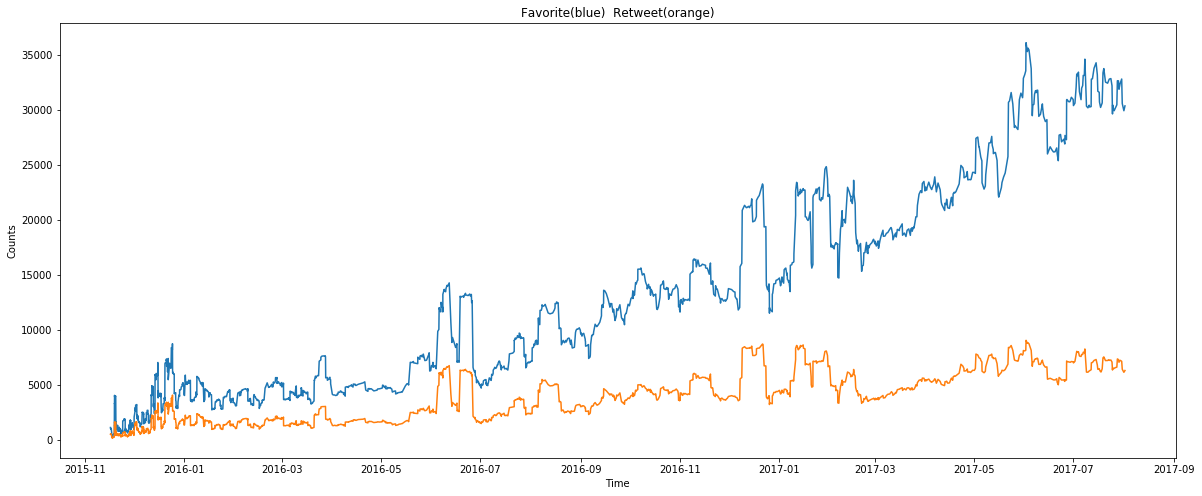

In [75]:
plt.figure(figsize=(20,8))
plt.plot(x,y1);
plt.plot(x,y2);
plt.xlabel('Time');
plt.ylabel('Counts');
plt.title('Favorite(blue)  Retweet(orange)');

**分析与结论**
- 从上图可以看出，随着时间的推移，点赞数有明显的上升趋势，转发数有上升，但是趋势不明显。
- 从上图可以看出，点赞数一直高于转发数，在推特上可能是人们更喜欢用点赞来表示对推特内容的喜欢，点赞这个行为比转发更容易。
- 可能因为推特主的粉丝数量的上升，导致有这样明显在数量上升，如果用点赞数与阅读的用户数比值更能直接反映人们是否越来月喜欢狗。

<a id="conculsion">

## 4.结论

- 1.通过分析推特主发推特的时间，发现推特主习惯于凌晨0点1点2点3点及下午16点17点这些发推特，从上午6点到下午14点发推特比较少或没有。在一周当中，周一到周日发推特数量差不多，没有明显变化，周一最多，周末相对较少。
- 2.通过分析不同地位的狗对应的点赞数和转发数发现，pupper地位的狗最受粉丝喜欢，这类狗的转发和点赞数最高，其次是doggo地位的狗，而floofer和puppo地位的狗相对没有那么受粉丝喜欢。
- 3.分析随着时间的推移，点赞数和转发数的变化趋势，可以看出随着时间推移点赞数有明显的上升趋势，转发数有上升，但是趋势不明显。可以判断推特内容收到越来越多的关注。点赞数一直高于转发数，在推特上可能是人们更喜欢用点赞来表示对推特内容的喜欢，点赞这个行为比转发更容易。可能因为推特主的粉丝数量的上升，导致有这样明显在数量上升，如果用点赞数与阅读的用户数比值更能直接反映人们是否越来月喜欢狗。
- 4.转发数和点赞数有高度相关，相关系数是0.91，这个也符合常理，点赞和转发都是对其内容喜欢的表现。推特主对狗的评分与转发数和点赞数有低度相关，相关系数分别是0.30和0.40,说明每个人对狗都有自己的偏好，推特主的评分不能完全代表粉丝群对狗的评分。

    **局限性说明**
1. 尽可能的整理和清洗了数据，但不能保证对数据做到了100%的清洗及整理。
2. 关于点赞数，转发数，以及推特主的评分之间的关系，只是探索了相关关系，而不是他们之间的因果关系。
3. 时间推移，转发数和点赞数的趋势，没有考虑推特粉丝的数量，如果能分析转发数和点赞数在推特内容阅读的用户数的占比，可能更有说服力。